<a href="https://colab.research.google.com/github/kassy75035/Computer-Vision/blob/main/%E9%A1%8F%E8%89%B2%E7%9B%B8%E9%97%9C%E7%9A%84%E9%A0%90%E8%99%95%E7%90%86_Hw_PJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 作業

## [作業目標]:
熟悉對 HSV 的操作、Histogram equalization,以及二值化的使用。

## [作業重點]:
1. 將 RGB 轉換為 HSV,分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization,並印出處理結果(處理完的圖
片和處理完的 Value)
3. 將 RGB 轉換為 Gray level,再進行單值二值化及自適應二值化



## 解題步驟

1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)
3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

In [1]:
import cv2
from google.colab.patches import cv2_imshow # for image display

from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 先讀取並顯示圖片

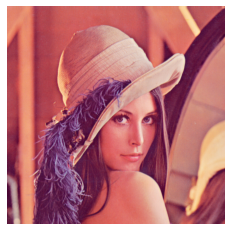

In [2]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
img_path = '/content/gdrive/My Drive/Colab Notebooks/ComputerVision/data/lena.png'
img = cv2.imread(img_path)

# cv2 預設 color space 是 BGR，但 matplotlib，
# 顯示是以 RGB 來顯示，故需要做順序的調整
plt.imshow(img[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

## 1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value

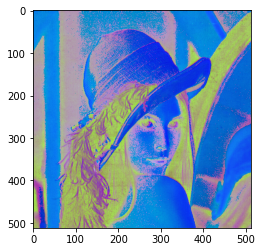

In [8]:
# 將 RGB 轉換為 HSV
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(imghsv)


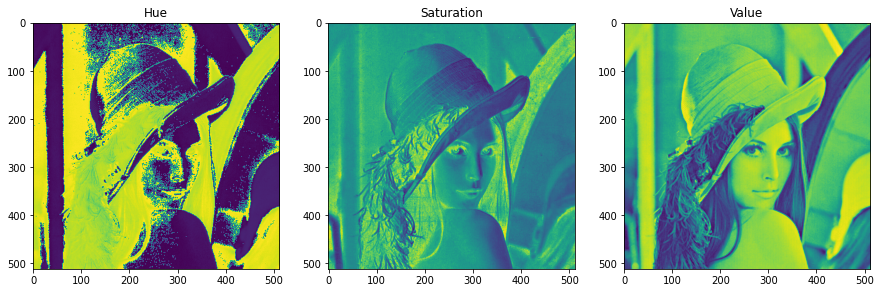

In [17]:
# 分別印出 Hue, Saturation, Value
title = ['Hue', 'Saturation', 'Value']
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
# img_hue = imghsv[:,:,0]
# img_sat = imghsv[:,:,1]
# img_val = imghsv[:,:,2]
# plt.imshow(img_hue)
plt.figure(figsize = (15,5))
# subplots
for i in range(3):
  plt.subplot(1,3,i+1, title=title[i])
  plt.imshow(imghsv[:,:,i])

plt.show()

## 2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)

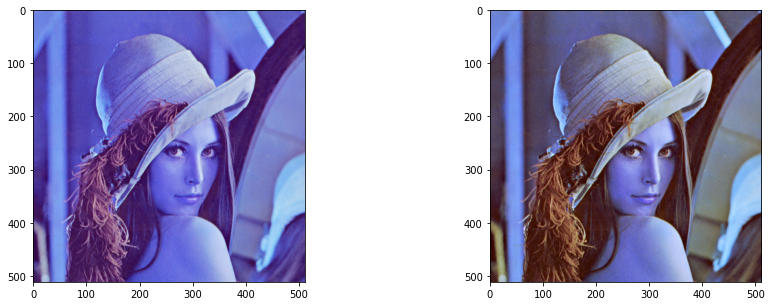

In [18]:
plt.figure(figsize = (15,5))
# 先印出 HE 前的圖片與 value
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
plt.subplot(1,2,1)
plt.imshow(img)
# 印出 HE 後的圖片與 value
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img_val = imghsv[:,:,2]
img_val_eq = cv2.equalizeHist(img_val)
img_eq = img
img_eq[:,:,2] = img_val_eq
plt.subplot(1,2,2)
plt.imshow(img_eq)

## 3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

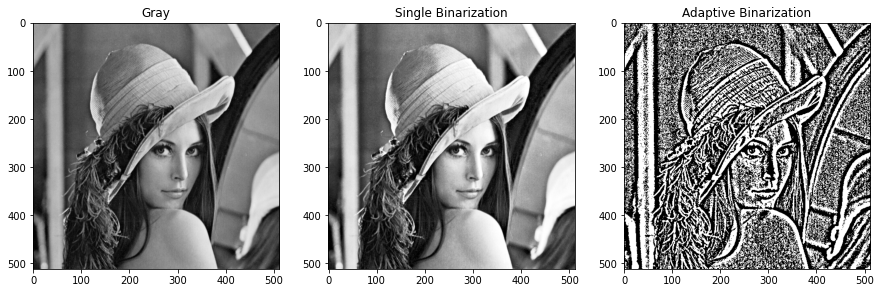

In [21]:
# 將圖片轉換為灰階圖片
# 要呈現gray level image需要再imshow設定cmap='gray'，否則內建使用BGR
plt.figure(figsize = (15,5))
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(1,3,1, title = "Gray")
plt.imshow(img_gray, cmap = 'gray')
# Single Binarization
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img_gray_sin = cv2.equalizeHist(img_gray)
plt.subplot(1,3,2, title = 'Single Binarization')
plt.imshow(img_gray_sin, cmap = 'gray')
# Adaptive Binarization
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img_gray_ada = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 0)
plt.subplot(1,3,3, title = 'Adaptive Binarization')
plt.imshow(img_gray_ada, cmap = 'gray')